# NN tension prediction for SUPERball
### &nbsp; &nbsp; &nbsp; Chiara Ercolani


Cross validation stuff added. This implementation trains the neural network with a big dataset and then saves it.

Dataset:2017-10-24_BiggerBetterData_1kHz.mat

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import os
import collections
import matplotlib.pyplot as plt
import scipy.io

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#Combine data from all three datasets
dataset1=scipy.io.loadmat('2018-02-08_Biggester_slow_data.mat')
#dataset2=scipy.io.loadmat('2018-02-01_17_Just_motor22.mat')
#dataset3=scipy.io.loadmat('2018-01-30_16-07_Better_ReallyBig_Data.mat')


In [3]:
effort=dataset1.get('effort')
#effort=np.concatenate((effort,dataset2.get('effort')))
#effort=np.concatenate((effort,dataset3.get('effort')))
print(effort.shape)

(1127580, 25)


In [4]:
#Cross validation parameters
#Number of cross validation boxes
K=10
#Number of samples in each box
set_length=int(len(effort)/K)

In [5]:
#Various paramenters
D=24   #number of features recorded at each time step(sequence length)
#CHANGING BATCH SIZE
batch_size = 50
batch_len =(set_length*(K-1))//batch_size
margin=0.05                                     # accuracy margin
lr=0.000005                                       # learning rate (originally 0.0003)
epochNumber=250                                  # Number of epochs
                                
H1= 15*D                                         # size of hidden state

print('train_data_len=',set_length*(K-1),' batch_size=',batch_size,' batch_len=',
      batch_len,' D=',D,'H1=',H1)

train_data_len= 1014822  batch_size= 50  batch_len= 20296  D= 24 H1= 360


In [6]:
#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, target)
Xin= tf.placeholder(tf.float32,shape=[batch_size,D],name='Xin')
Ytarget = tf.placeholder(tf.float32,shape=[batch_size,1],name='Ytarget')

#Xavier initialization for weights 
#http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
Wx1 = tf.get_variable("Wx1", shape=[D, H1],initializer=tf.contrib.layers.xavier_initializer()); print('Wx1=',Wx1.get_shape())
#Wx2 = tf.get_variable("Wx2", shape=[H1, H2],initializer=tf.contrib.layers.xavier_initializer()); print('Wx2=',Wx2.get_shape())
#Wx3 = tf.get_variable("Wx3", shape=[H2, H3],initializer=tf.contrib.layers.xavier_initializer()); print('Wx3=',Wx2.get_shape())
Wy = tf.get_variable("Wy", shape=[H1, 1],initializer=tf.contrib.layers.xavier_initializer()); print('Wy=',Wy.get_shape())

#Biases initalized to 0
bh1 = tf.Variable(tf.zeros([1,H1]),name="bh1"); print('bh1=',bh1.get_shape())
#bh2 = tf.Variable(tf.zeros([1,H2]),name="bh2"); print('bh2=',bh2.get_shape())
#bh3 = tf.Variable(tf.zeros([1,H3]),name="bh3"); print('bh3=',bh3.get_shape())
by = tf.Variable(tf.zeros([1,1]),name="by"); print('by=',by.get_shape())

Wx1= (24, 360)
Wy= (360, 1)
bh1= (1, 360)
by= (1, 1)


In [7]:
# NN implementation with ReLU function and one hidden layer

h_1=tf.nn.relu(tf.matmul(Xin,Wx1)+bh1)
#h_2=tf.nn.relu(tf.matmul(h_1,Wx2)+bh2)
#h_3=tf.nn.relu(tf.matmul(h_2,Wx3)+bh3)
y_=tf.add(tf.matmul(h_1,Wy),by,name='y_')

print('Ypredicted=',y_.get_shape())
print('Ytarget=',Ytarget.get_shape())

#Mean Absolute Error cost function

cost=tf.reduce_mean(tf.abs(tf.subtract(y_, Ytarget)))

#Optimizer used to implement backpropagation
#Adding decayed learning rate
#batch_var=tf.Variable(0)
#learning_rate=tf.train.exponential_decay(lr,batch_var*batch_size,len(train_features),0.95,staircase=True)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost,global_step=batch_var)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

Ypredicted= (50, 1)
Ytarget= (50, 1)


In [8]:
#ACCURACY INTERVAL
lower_bound =tf.greater_equal(y_,tf.subtract(Ytarget,margin))
upper_bound= tf.less_equal(y_,tf.add(Ytarget,margin))
correct=tf.equal(lower_bound,upper_bound)
#correct=tf.equal(cast_out_data,cast_out_pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
print('Accuracy measure set')

Accuracy measure set


CROSS VALIDATION ITERATION 0
Epoch: 0, Cost: 0.38994744420051575, Accuracy: 0.0
Epoch: 1, Cost: 0.5739648938179016, Accuracy: 0.0
Epoch: 2, Cost: 0.5047768354415894, Accuracy: 0.0
Epoch: 3, Cost: 0.44393324851989746, Accuracy: 0.0
Epoch: 4, Cost: 0.38892504572868347, Accuracy: 0.0
Epoch: 5, Cost: 0.34224405884742737, Accuracy: 0.0
Epoch: 6, Cost: 0.30582255125045776, Accuracy: 0.0
Epoch: 7, Cost: 0.2798067033290863, Accuracy: 0.0
Epoch: 8, Cost: 0.25761857628822327, Accuracy: 0.0
Epoch: 9, Cost: 0.24354144930839539, Accuracy: 0.0
Epoch: 10, Cost: 0.23206062614917755, Accuracy: 0.0
Epoch: 11, Cost: 0.22120706737041473, Accuracy: 0.0
Epoch: 12, Cost: 0.2095009833574295, Accuracy: 0.0
Epoch: 13, Cost: 0.1997491419315338, Accuracy: 0.0
Epoch: 14, Cost: 0.19212724268436432, Accuracy: 0.0
Epoch: 15, Cost: 0.1855883002281189, Accuracy: 0.0
Epoch: 16, Cost: 0.18095999956130981, Accuracy: 0.0
Epoch: 17, Cost: 0.17589376866817474, Accuracy: 0.0
Epoch: 18, Cost: 0.1706477552652359, Accuracy: 0.0


Epoch: 133, Cost: 0.020618436858057976, Accuracy: 0.9599999785423279
Epoch: 134, Cost: 0.02051207795739174, Accuracy: 0.9599999785423279
Epoch: 135, Cost: 0.020366929471492767, Accuracy: 0.9599999785423279
Epoch: 136, Cost: 0.020276786759495735, Accuracy: 0.9599999785423279
Epoch: 137, Cost: 0.02008705586194992, Accuracy: 0.9800000190734863
Epoch: 138, Cost: 0.019897427409887314, Accuracy: 0.9800000190734863
Epoch: 139, Cost: 0.019781921058893204, Accuracy: 0.9800000190734863
Epoch: 140, Cost: 0.01962965913116932, Accuracy: 0.9800000190734863
Epoch: 141, Cost: 0.01945134811103344, Accuracy: 0.9800000190734863
Epoch: 142, Cost: 0.01931125856935978, Accuracy: 0.9800000190734863
Epoch: 143, Cost: 0.01913110911846161, Accuracy: 0.9800000190734863
Epoch: 144, Cost: 0.018920252099633217, Accuracy: 0.9800000190734863
Epoch: 145, Cost: 0.018780481070280075, Accuracy: 0.9800000190734863
Epoch: 146, Cost: 0.018567822873592377, Accuracy: 0.9800000190734863
Epoch: 147, Cost: 0.01839543879032135, A

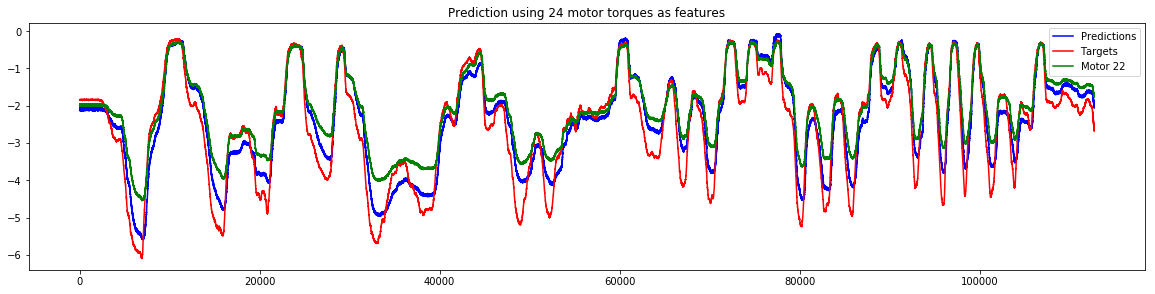

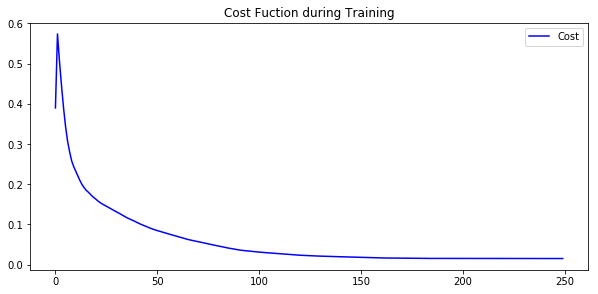

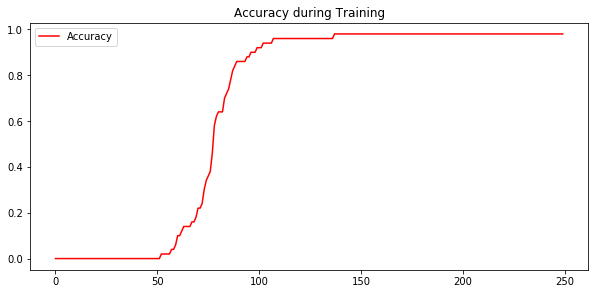

And now costs for iteration  0
[0.38994744, 0.57396489, 0.50477684, 0.44393325, 0.38892505, 0.34224406, 0.30582255, 0.2798067, 0.25761858, 0.24354145, 0.23206063, 0.22120707, 0.20950098, 0.19974914, 0.19212724, 0.1855883, 0.18096, 0.17589377, 0.17064776, 0.16625956, 0.16188055, 0.15783094, 0.15412302, 0.15087399, 0.14798981, 0.14524621, 0.14260612, 0.13964306, 0.13660409, 0.13399592, 0.13139814, 0.12855105, 0.125687, 0.12255491, 0.11970273, 0.1170048, 0.11456823, 0.11199921, 0.1098613, 0.10770768, 0.10501949, 0.10266676, 0.100347, 0.098299034, 0.096147925, 0.09417183, 0.091860555, 0.089775637, 0.087982312, 0.086248443, 0.084752895, 0.083225958, 0.081471682, 0.080152363, 0.078629717, 0.077303179, 0.075712889, 0.074300334, 0.072835393, 0.071217701, 0.069802374, 0.068593033, 0.067230739, 0.065701798, 0.064064801, 0.062723286, 0.061466381, 0.06037518, 0.059418667, 0.058410928, 0.057271853, 0.056153499, 0.055166978, 0.053996488, 0.052738395, 0.051620942, 0.050583411, 0.04959796, 0.048474539

Epoch: 46, Cost: 0.08576911687850952, Accuracy: 0.0
Epoch: 47, Cost: 0.08313566446304321, Accuracy: 0.019999999552965164
Epoch: 48, Cost: 0.08038367331027985, Accuracy: 0.019999999552965164
Epoch: 49, Cost: 0.0778474509716034, Accuracy: 0.019999999552965164
Epoch: 50, Cost: 0.07521240413188934, Accuracy: 0.03999999910593033
Epoch: 51, Cost: 0.0731552317738533, Accuracy: 0.03999999910593033
Epoch: 52, Cost: 0.07127461582422256, Accuracy: 0.05999999865889549
Epoch: 53, Cost: 0.06963415443897247, Accuracy: 0.10000000149011612
Epoch: 54, Cost: 0.06811132282018661, Accuracy: 0.10000000149011612
Epoch: 55, Cost: 0.06630566716194153, Accuracy: 0.11999999731779099
Epoch: 56, Cost: 0.0647219866514206, Accuracy: 0.14000000059604645
Epoch: 57, Cost: 0.06335988640785217, Accuracy: 0.1599999964237213
Epoch: 58, Cost: 0.062222834676504135, Accuracy: 0.1599999964237213
Epoch: 59, Cost: 0.060969214886426926, Accuracy: 0.1599999964237213
Epoch: 60, Cost: 0.05984162166714668, Accuracy: 0.159999996423721

Epoch: 167, Cost: 0.02011433057487011, Accuracy: 0.9399999976158142
Epoch: 168, Cost: 0.019932204857468605, Accuracy: 0.9399999976158142
Epoch: 169, Cost: 0.019710419699549675, Accuracy: 0.9399999976158142
Epoch: 170, Cost: 0.019435303285717964, Accuracy: 0.9399999976158142
Epoch: 171, Cost: 0.019531184807419777, Accuracy: 0.9399999976158142
Epoch: 172, Cost: 0.01971273124217987, Accuracy: 0.9399999976158142
Epoch: 173, Cost: 0.019836649298667908, Accuracy: 0.9399999976158142
Epoch: 174, Cost: 0.01994049735367298, Accuracy: 0.9399999976158142
Epoch: 175, Cost: 0.02000315859913826, Accuracy: 0.9399999976158142
Epoch: 176, Cost: 0.020086238160729408, Accuracy: 0.9399999976158142
Epoch: 177, Cost: 0.020160213112831116, Accuracy: 0.9399999976158142
Epoch: 178, Cost: 0.0202496275305748, Accuracy: 0.9399999976158142
Epoch: 179, Cost: 0.02033167891204357, Accuracy: 0.9399999976158142
Epoch: 180, Cost: 0.020393019542098045, Accuracy: 0.9399999976158142
Epoch: 181, Cost: 0.02046244777739048, Ac

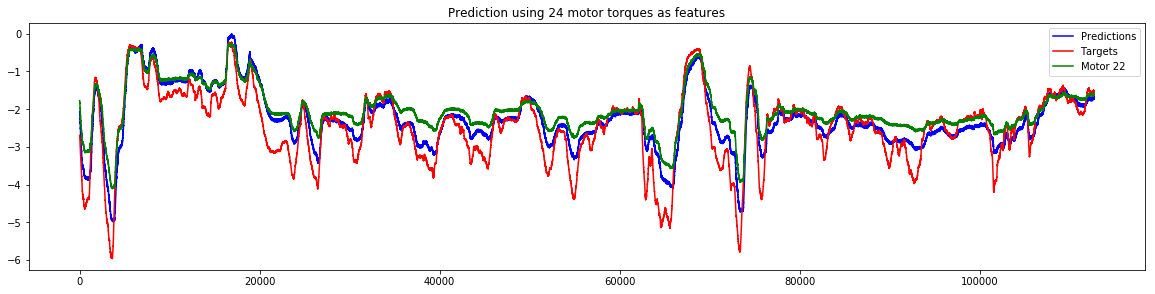

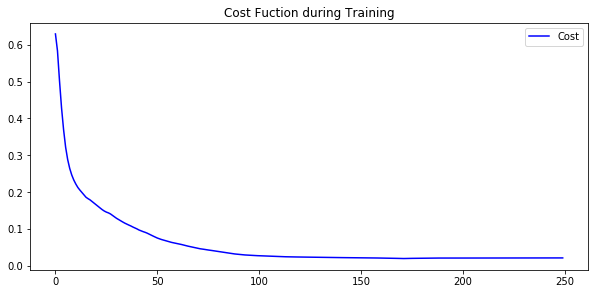

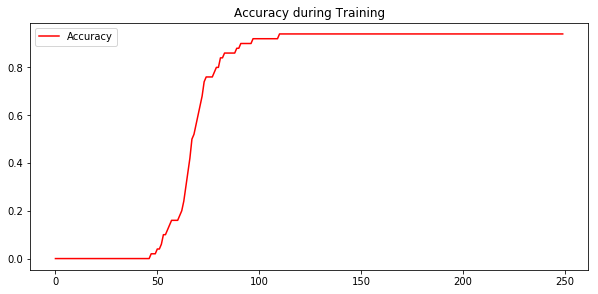

And now costs for iteration  1
[0.62945223, 0.58364129, 0.50194061, 0.42831135, 0.36937678, 0.32185706, 0.28846729, 0.26440358, 0.24648914, 0.23279394, 0.2218688, 0.21252459, 0.20540933, 0.19881152, 0.192186, 0.18596463, 0.18210791, 0.1787536, 0.1742305, 0.16941124, 0.16495863, 0.1608959, 0.15648717, 0.15211403, 0.14847532, 0.14559327, 0.14352359, 0.14069591, 0.13686022, 0.13268204, 0.12872811, 0.12537618, 0.12232735, 0.11886921, 0.11576664, 0.11306205, 0.1104661, 0.10803027, 0.1051304, 0.10275238, 0.10005975, 0.097049855, 0.09475521, 0.092651866, 0.090757586, 0.088522106, 0.085769117, 0.083135664, 0.080383673, 0.077847451, 0.075212404, 0.073155232, 0.071274616, 0.069634154, 0.068111323, 0.066305667, 0.064721987, 0.063359886, 0.062222835, 0.060969215, 0.059841622, 0.058681641, 0.057469279, 0.055998154, 0.054636516, 0.053240567, 0.052008726, 0.050720073, 0.049424704, 0.048343495, 0.047190629, 0.046075393, 0.045346469, 0.044495329, 0.043488722, 0.042724282, 0.041835815, 0.041162301, 0.04

Epoch: 59, Cost: 0.07343148440122604, Accuracy: 0.03999999910593033
Epoch: 60, Cost: 0.07160933315753937, Accuracy: 0.05999999865889549
Epoch: 61, Cost: 0.06977738440036774, Accuracy: 0.07999999821186066
Epoch: 62, Cost: 0.06766261905431747, Accuracy: 0.11999999731779099
Epoch: 63, Cost: 0.06575508415699005, Accuracy: 0.14000000059604645
Epoch: 64, Cost: 0.0640997588634491, Accuracy: 0.14000000059604645
Epoch: 65, Cost: 0.06271813064813614, Accuracy: 0.1599999964237213
Epoch: 66, Cost: 0.06134497746825218, Accuracy: 0.1599999964237213
Epoch: 67, Cost: 0.059937428683042526, Accuracy: 0.1599999964237213
Epoch: 68, Cost: 0.05861995369195938, Accuracy: 0.18000000715255737
Epoch: 69, Cost: 0.05742328613996506, Accuracy: 0.20000000298023224
Epoch: 70, Cost: 0.05611925572156906, Accuracy: 0.23999999463558197
Epoch: 71, Cost: 0.05463646724820137, Accuracy: 0.25999999046325684
Epoch: 72, Cost: 0.05321812257170677, Accuracy: 0.3400000035762787
Epoch: 73, Cost: 0.051759835332632065, Accuracy: 0.4

Epoch: 180, Cost: 0.013684217818081379, Accuracy: 0.9800000190734863
Epoch: 181, Cost: 0.013620509766042233, Accuracy: 0.9800000190734863
Epoch: 182, Cost: 0.013526997528970242, Accuracy: 1.0
Epoch: 183, Cost: 0.013382389210164547, Accuracy: 1.0
Epoch: 184, Cost: 0.013794035650789738, Accuracy: 0.9800000190734863
Epoch: 185, Cost: 0.014168407768011093, Accuracy: 0.9800000190734863
Epoch: 186, Cost: 0.014449229463934898, Accuracy: 0.9800000190734863
Epoch: 187, Cost: 0.01468498446047306, Accuracy: 0.9800000190734863
Epoch: 188, Cost: 0.014932441525161266, Accuracy: 0.9800000190734863
Epoch: 189, Cost: 0.01510242186486721, Accuracy: 0.9800000190734863
Epoch: 190, Cost: 0.015245511196553707, Accuracy: 0.9800000190734863
Epoch: 191, Cost: 0.015307152643799782, Accuracy: 0.9800000190734863
Epoch: 192, Cost: 0.01531890593469143, Accuracy: 0.9800000190734863
Epoch: 193, Cost: 0.015281529165804386, Accuracy: 0.9800000190734863
Epoch: 194, Cost: 0.015251586213707924, Accuracy: 0.980000019073486

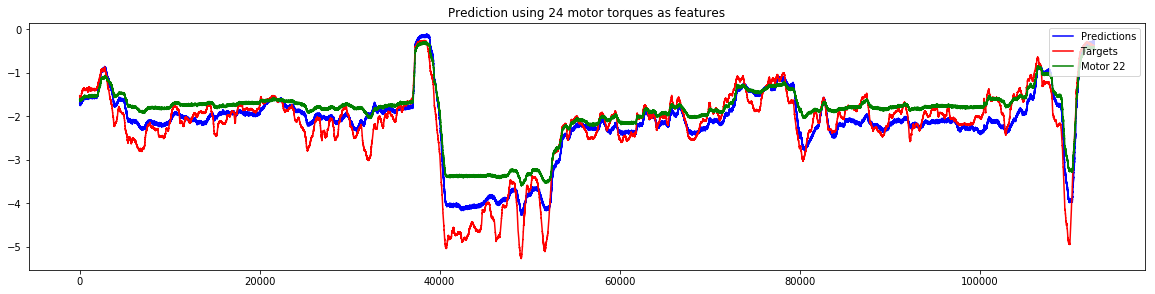

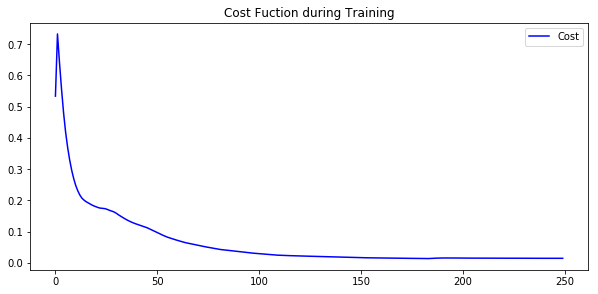

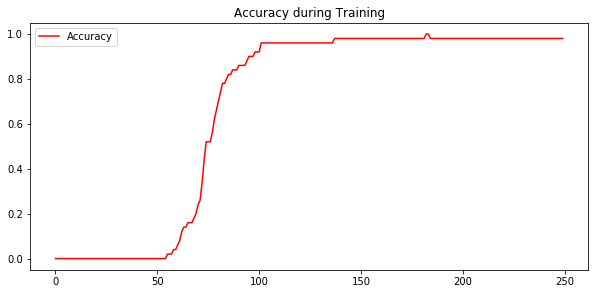

And now costs for iteration  2
[0.53362775, 0.73298395, 0.64052397, 0.55534589, 0.47979259, 0.41805747, 0.36899304, 0.32865316, 0.29554957, 0.26867104, 0.24672359, 0.23006605, 0.21661945, 0.20692497, 0.20077427, 0.19582686, 0.19201982, 0.18810156, 0.18463427, 0.18170978, 0.17922258, 0.17665105, 0.1750284, 0.17423975, 0.17359725, 0.17200877, 0.16929945, 0.16673744, 0.16469757, 0.16187298, 0.15799651, 0.15329334, 0.14909552, 0.14518124, 0.14128195, 0.13751148, 0.13416639, 0.13105084, 0.12833804, 0.12565157, 0.12341703, 0.12125631, 0.11874323, 0.11639305, 0.11433255, 0.11209591, 0.10919005, 0.10593393, 0.10291018, 0.099969186, 0.096846238, 0.093596347, 0.090273999, 0.087319314, 0.084486313, 0.081902653, 0.079699233, 0.077354528, 0.075248539, 0.073431484, 0.071609333, 0.069777384, 0.067662619, 0.065755084, 0.064099759, 0.062718131, 0.061344977, 0.059937429, 0.058619954, 0.057423286, 0.056119256, 0.054636467, 0.053218123, 0.051759835, 0.050545119, 0.04933263, 0.048101414, 0.046879683, 0.045

Epoch: 45, Cost: 0.11623323708772659, Accuracy: 0.0
Epoch: 46, Cost: 0.11450065672397614, Accuracy: 0.0
Epoch: 47, Cost: 0.11269542574882507, Accuracy: 0.0
Epoch: 48, Cost: 0.11068950593471527, Accuracy: 0.0
Epoch: 49, Cost: 0.10837814956903458, Accuracy: 0.0
Epoch: 50, Cost: 0.105725958943367, Accuracy: 0.0
Epoch: 51, Cost: 0.10302822291851044, Accuracy: 0.0
Epoch: 52, Cost: 0.10008125007152557, Accuracy: 0.0
Epoch: 53, Cost: 0.09719272702932358, Accuracy: 0.0
Epoch: 54, Cost: 0.09476826339960098, Accuracy: 0.0
Epoch: 55, Cost: 0.09212695062160492, Accuracy: 0.0
Epoch: 56, Cost: 0.08951406180858612, Accuracy: 0.0
Epoch: 57, Cost: 0.08673861622810364, Accuracy: 0.0
Epoch: 58, Cost: 0.0840858519077301, Accuracy: 0.0
Epoch: 59, Cost: 0.08173486590385437, Accuracy: 0.019999999552965164
Epoch: 60, Cost: 0.07945180684328079, Accuracy: 0.019999999552965164
Epoch: 61, Cost: 0.07728305459022522, Accuracy: 0.019999999552965164
Epoch: 62, Cost: 0.07541739195585251, Accuracy: 0.05999999865889549


Epoch: 169, Cost: 0.026845257729291916, Accuracy: 0.9200000166893005
Epoch: 170, Cost: 0.02683011256158352, Accuracy: 0.9200000166893005
Epoch: 171, Cost: 0.026858139783143997, Accuracy: 0.9200000166893005
Epoch: 172, Cost: 0.026891684159636497, Accuracy: 0.9200000166893005
Epoch: 173, Cost: 0.026912178844213486, Accuracy: 0.9200000166893005
Epoch: 174, Cost: 0.026978859677910805, Accuracy: 0.9200000166893005
Epoch: 175, Cost: 0.027084045112133026, Accuracy: 0.9200000166893005
Epoch: 176, Cost: 0.027104243636131287, Accuracy: 0.9200000166893005
Epoch: 177, Cost: 0.02714763581752777, Accuracy: 0.8999999761581421
Epoch: 178, Cost: 0.027192626148462296, Accuracy: 0.8999999761581421
Epoch: 179, Cost: 0.02729724906384945, Accuracy: 0.8999999761581421
Epoch: 180, Cost: 0.027354586869478226, Accuracy: 0.8999999761581421
Epoch: 181, Cost: 0.027374999597668648, Accuracy: 0.8999999761581421
Epoch: 182, Cost: 0.027310695499181747, Accuracy: 0.8999999761581421
Epoch: 183, Cost: 0.02729003503918647

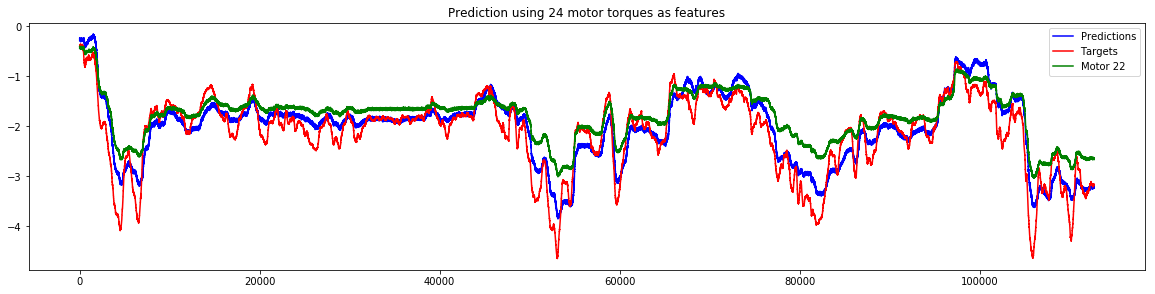

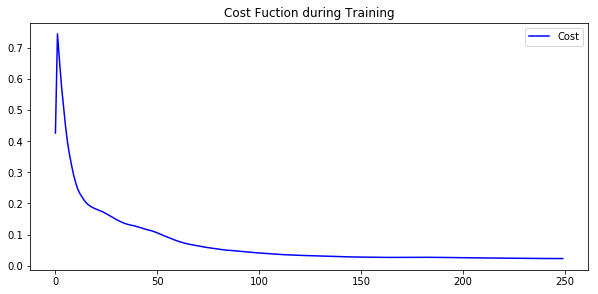

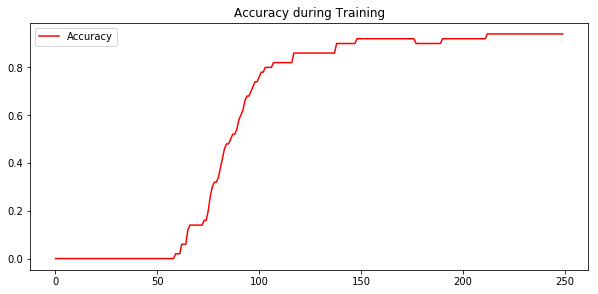

And now costs for iteration  3
[0.42609191, 0.74403453, 0.65706289, 0.57513607, 0.50835079, 0.44480324, 0.39325896, 0.35318556, 0.31977248, 0.28928769, 0.26547277, 0.24529207, 0.23179668, 0.22178185, 0.21132109, 0.20290683, 0.19657226, 0.19181904, 0.18778095, 0.18461548, 0.1817762, 0.17920637, 0.17657742, 0.17399094, 0.17058197, 0.16692558, 0.16326432, 0.15937242, 0.15575947, 0.15193897, 0.14815661, 0.14484005, 0.14164896, 0.13866726, 0.13614567, 0.13409378, 0.13201302, 0.13045701, 0.12922755, 0.12778999, 0.12595788, 0.12384191, 0.12194544, 0.11985654, 0.11778283, 0.11623324, 0.11450066, 0.11269543, 0.11068951, 0.10837815, 0.10572596, 0.10302822, 0.10008125, 0.097192727, 0.094768263, 0.092126951, 0.089514062, 0.086738616, 0.084085852, 0.081734866, 0.079451807, 0.077283055, 0.075417392, 0.073503964, 0.071737379, 0.070242465, 0.068828411, 0.067530192, 0.066290982, 0.064789183, 0.063496478, 0.06232091, 0.061200496, 0.060067046, 0.05920412, 0.058219995, 0.057013225, 0.05614686, 0.055286575

Epoch: 49, Cost: 0.06644604355096817, Accuracy: 0.11999999731779099
Epoch: 50, Cost: 0.0647522509098053, Accuracy: 0.14000000059604645
Epoch: 51, Cost: 0.06323990970849991, Accuracy: 0.14000000059604645
Epoch: 52, Cost: 0.061669863760471344, Accuracy: 0.14000000059604645
Epoch: 53, Cost: 0.06030414253473282, Accuracy: 0.14000000059604645
Epoch: 54, Cost: 0.05880625545978546, Accuracy: 0.1599999964237213
Epoch: 55, Cost: 0.057743482291698456, Accuracy: 0.20000000298023224
Epoch: 56, Cost: 0.05655382573604584, Accuracy: 0.25999999046325684
Epoch: 57, Cost: 0.05544363334774971, Accuracy: 0.2800000011920929
Epoch: 58, Cost: 0.054218925535678864, Accuracy: 0.3199999928474426
Epoch: 59, Cost: 0.053060632199048996, Accuracy: 0.3400000035762787
Epoch: 60, Cost: 0.052153080701828, Accuracy: 0.36000001430511475
Epoch: 61, Cost: 0.051085636019706726, Accuracy: 0.41999998688697815
Epoch: 62, Cost: 0.05026913806796074, Accuracy: 0.5
Epoch: 63, Cost: 0.04955051466822624, Accuracy: 0.5
Epoch: 64, Cos

Epoch: 171, Cost: 0.03114767000079155, Accuracy: 0.8600000143051147
Epoch: 172, Cost: 0.0310687143355608, Accuracy: 0.8600000143051147
Epoch: 173, Cost: 0.03099360316991806, Accuracy: 0.8600000143051147
Epoch: 174, Cost: 0.030937720090150833, Accuracy: 0.8600000143051147
Epoch: 175, Cost: 0.030887553468346596, Accuracy: 0.8600000143051147
Epoch: 176, Cost: 0.030825234949588776, Accuracy: 0.8600000143051147
Epoch: 177, Cost: 0.030806951224803925, Accuracy: 0.8600000143051147
Epoch: 178, Cost: 0.03075088933110237, Accuracy: 0.8600000143051147
Epoch: 179, Cost: 0.03068179078400135, Accuracy: 0.8600000143051147
Epoch: 180, Cost: 0.030644146725535393, Accuracy: 0.8600000143051147
Epoch: 181, Cost: 0.030572153627872467, Accuracy: 0.8799999952316284
Epoch: 182, Cost: 0.030522041022777557, Accuracy: 0.8799999952316284
Epoch: 183, Cost: 0.030444912612438202, Accuracy: 0.8799999952316284
Epoch: 184, Cost: 0.030382947996258736, Accuracy: 0.8799999952316284
Epoch: 185, Cost: 0.030397430062294006, 

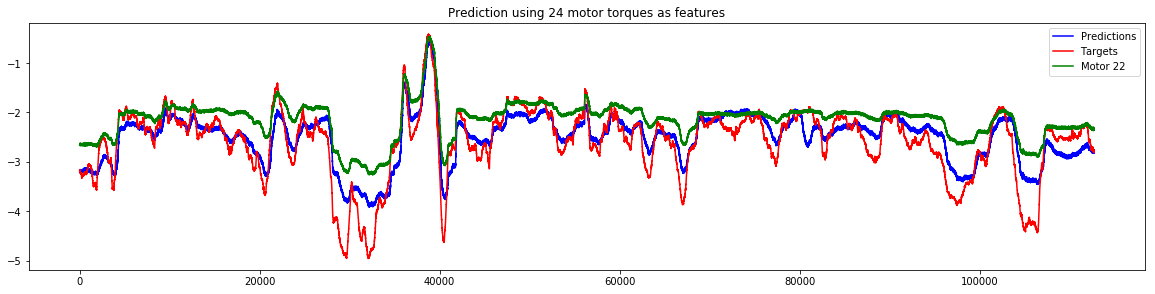

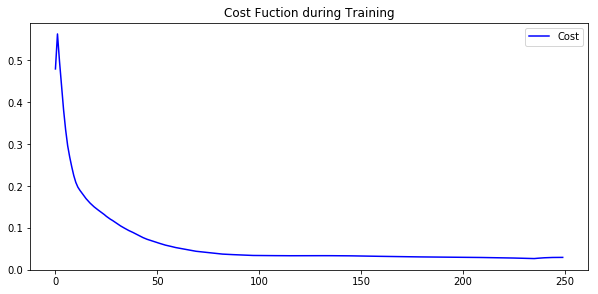

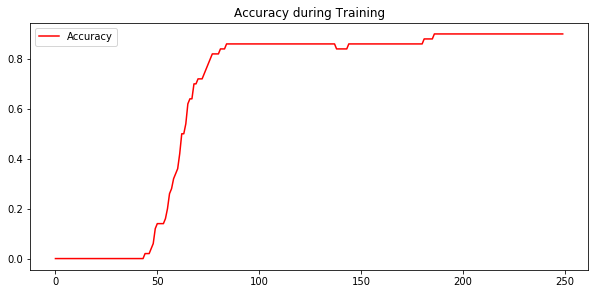

And now costs for iteration  4
[0.47976547, 0.56337839, 0.49759138, 0.43871439, 0.38182682, 0.3344107, 0.29636911, 0.26935977, 0.24609871, 0.22501846, 0.20873831, 0.19746676, 0.18985768, 0.18345304, 0.17671795, 0.17006786, 0.1644806, 0.15925319, 0.15459634, 0.15019572, 0.14629382, 0.14260323, 0.13902305, 0.13575497, 0.13177793, 0.12762201, 0.12419439, 0.12064912, 0.1178053, 0.11446722, 0.11107221, 0.10795593, 0.10462923, 0.10177704, 0.099042423, 0.096413776, 0.093712203, 0.091545865, 0.089218594, 0.08668837, 0.084050521, 0.081720859, 0.079338841, 0.076768585, 0.074617453, 0.072746903, 0.071217649, 0.06967397, 0.06823086, 0.066446044, 0.064752251, 0.06323991, 0.061669864, 0.060304143, 0.058806255, 0.057743482, 0.056553826, 0.055443633, 0.054218926, 0.053060632, 0.052153081, 0.051085636, 0.050269138, 0.049550515, 0.048501119, 0.047534399, 0.046581298, 0.045709409, 0.044833273, 0.044155322, 0.043619774, 0.042921249, 0.042581785, 0.042089518, 0.041675944, 0.041125719, 0.040663175, 0.039898

Epoch: 42, Cost: 0.056607723236083984, Accuracy: 0.25999999046325684
Epoch: 43, Cost: 0.05476349964737892, Accuracy: 0.3199999928474426
Epoch: 44, Cost: 0.052613213658332825, Accuracy: 0.3400000035762787
Epoch: 45, Cost: 0.050328511744737625, Accuracy: 0.4399999976158142
Epoch: 46, Cost: 0.04829644039273262, Accuracy: 0.47999998927116394
Epoch: 47, Cost: 0.04654012620449066, Accuracy: 0.5799999833106995
Epoch: 48, Cost: 0.044661857187747955, Accuracy: 0.6800000071525574
Epoch: 49, Cost: 0.04258812963962555, Accuracy: 0.7599999904632568
Epoch: 50, Cost: 0.04077642410993576, Accuracy: 0.800000011920929
Epoch: 51, Cost: 0.03868517652153969, Accuracy: 0.8399999737739563
Epoch: 52, Cost: 0.036592621356248856, Accuracy: 0.8999999761581421
Epoch: 53, Cost: 0.03431674838066101, Accuracy: 0.9399999976158142
Epoch: 54, Cost: 0.032447200268507004, Accuracy: 0.9399999976158142
Epoch: 55, Cost: 0.030594803392887115, Accuracy: 0.9599999785423279
Epoch: 56, Cost: 0.029035210609436035, Accuracy: 0.959

Epoch: 169, Cost: 0.012830836698412895, Accuracy: 0.9800000190734863
Epoch: 170, Cost: 0.012840420939028263, Accuracy: 0.9800000190734863
Epoch: 171, Cost: 0.012852396816015244, Accuracy: 0.9800000190734863
Epoch: 172, Cost: 0.012861528433859348, Accuracy: 0.9800000190734863
Epoch: 173, Cost: 0.012872524559497833, Accuracy: 0.9800000190734863
Epoch: 174, Cost: 0.012884223833680153, Accuracy: 0.9800000190734863
Epoch: 175, Cost: 0.012897641398012638, Accuracy: 0.9800000190734863
Epoch: 176, Cost: 0.012911804020404816, Accuracy: 0.9800000190734863
Epoch: 177, Cost: 0.012929687276482582, Accuracy: 0.9800000190734863
Epoch: 178, Cost: 0.012940376065671444, Accuracy: 0.9800000190734863
Epoch: 179, Cost: 0.01295309979468584, Accuracy: 0.9800000190734863
Epoch: 180, Cost: 0.012963826768100262, Accuracy: 0.9800000190734863
Epoch: 181, Cost: 0.012975580990314484, Accuracy: 0.9800000190734863
Epoch: 182, Cost: 0.012989716604351997, Accuracy: 0.9800000190734863
Epoch: 183, Cost: 0.013003509491682

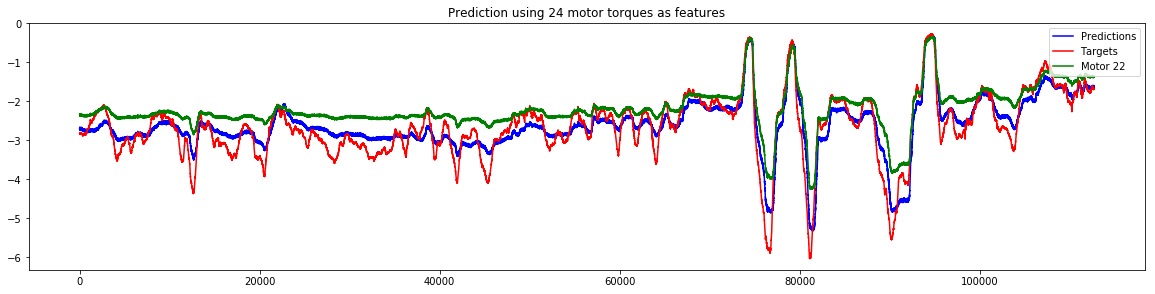

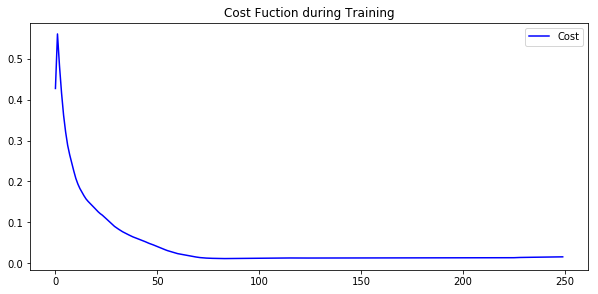

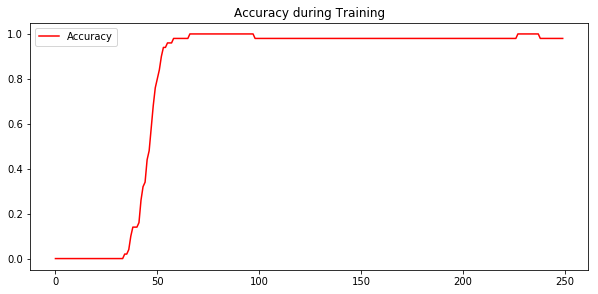

And now costs for iteration  5
[0.42756629, 0.56106985, 0.48231313, 0.41634136, 0.36205637, 0.32092351, 0.28838882, 0.26511911, 0.24484609, 0.22562785, 0.20754795, 0.19375575, 0.18268618, 0.1738625, 0.16500455, 0.15724312, 0.15130229, 0.14622264, 0.14136596, 0.13591957, 0.13058391, 0.12548828, 0.12106325, 0.11744788, 0.11307441, 0.10834536, 0.1037204, 0.099076547, 0.094357684, 0.089902304, 0.086284392, 0.0829826, 0.079702295, 0.076701969, 0.074085042, 0.071491458, 0.069065332, 0.066602752, 0.064289123, 0.062226307, 0.060442381, 0.058487654, 0.056607723, 0.0547635, 0.052613214, 0.050328512, 0.04829644, 0.046540126, 0.044661857, 0.04258813, 0.040776424, 0.038685177, 0.036592621, 0.034316748, 0.0324472, 0.030594803, 0.029035211, 0.027649701, 0.026154907, 0.024651503, 0.023213767, 0.022279337, 0.021250263, 0.020183351, 0.019286847, 0.01848992, 0.017520396, 0.016633419, 0.015798742, 0.014944627, 0.014189794, 0.0135183, 0.013058743, 0.012625017, 0.012315385, 0.012051714, 0.011862588, 0.01169

Epoch: 44, Cost: 0.05826813727617264, Accuracy: 0.1599999964237213
Epoch: 45, Cost: 0.05733566731214523, Accuracy: 0.18000000715255737
Epoch: 46, Cost: 0.05659673735499382, Accuracy: 0.20000000298023224
Epoch: 47, Cost: 0.05563873425126076, Accuracy: 0.23999999463558197
Epoch: 48, Cost: 0.05458007752895355, Accuracy: 0.2800000011920929
Epoch: 49, Cost: 0.05344727635383606, Accuracy: 0.3199999928474426
Epoch: 50, Cost: 0.05251476913690567, Accuracy: 0.41999998688697815
Epoch: 51, Cost: 0.051550332456827164, Accuracy: 0.41999998688697815
Epoch: 52, Cost: 0.05048060417175293, Accuracy: 0.41999998688697815
Epoch: 53, Cost: 0.049404315650463104, Accuracy: 0.5
Epoch: 54, Cost: 0.048529013991355896, Accuracy: 0.5199999809265137
Epoch: 55, Cost: 0.04762635380029678, Accuracy: 0.5600000023841858
Epoch: 56, Cost: 0.04680526629090309, Accuracy: 0.6200000047683716
Epoch: 57, Cost: 0.04584119841456413, Accuracy: 0.6200000047683716
Epoch: 58, Cost: 0.044742342084646225, Accuracy: 0.6600000262260437


Epoch: 165, Cost: 0.035869646817445755, Accuracy: 0.8399999737739563
Epoch: 166, Cost: 0.036024197936058044, Accuracy: 0.8399999737739563
Epoch: 167, Cost: 0.03611568734049797, Accuracy: 0.8399999737739563
Epoch: 168, Cost: 0.036263320595026016, Accuracy: 0.8399999737739563
Epoch: 169, Cost: 0.0363539457321167, Accuracy: 0.8399999737739563
Epoch: 170, Cost: 0.03646796941757202, Accuracy: 0.8399999737739563
Epoch: 171, Cost: 0.036599740386009216, Accuracy: 0.8399999737739563
Epoch: 172, Cost: 0.03672569990158081, Accuracy: 0.8399999737739563
Epoch: 173, Cost: 0.03691541776061058, Accuracy: 0.8199999928474426
Epoch: 174, Cost: 0.037040553987026215, Accuracy: 0.8199999928474426
Epoch: 175, Cost: 0.03723936900496483, Accuracy: 0.8199999928474426
Epoch: 176, Cost: 0.037399936467409134, Accuracy: 0.8199999928474426
Epoch: 177, Cost: 0.03759855031967163, Accuracy: 0.8199999928474426
Epoch: 178, Cost: 0.037683259695768356, Accuracy: 0.8199999928474426
Epoch: 179, Cost: 0.03797588497400284, Acc

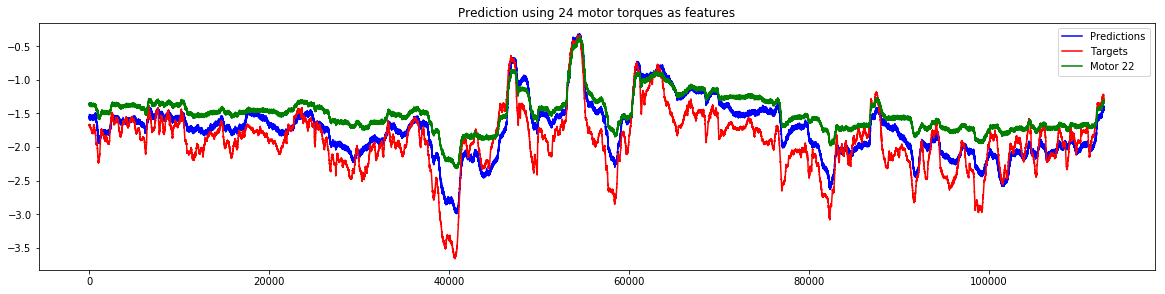

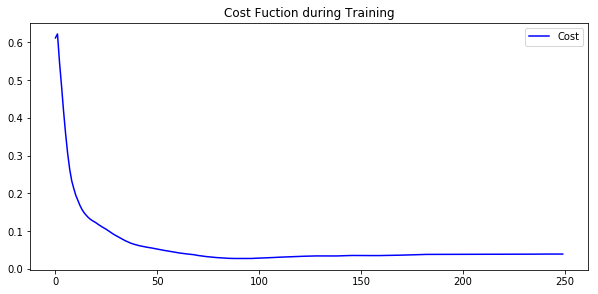

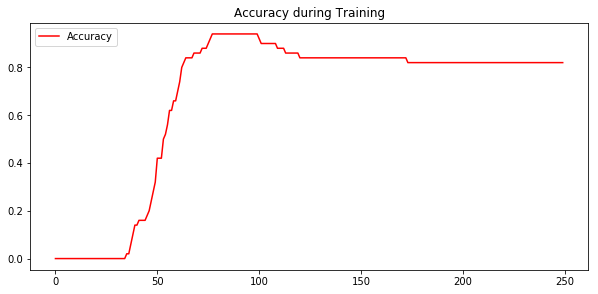

And now costs for iteration  6
[0.61196333, 0.62250638, 0.54744512, 0.48443449, 0.41718671, 0.357658, 0.30562028, 0.26395178, 0.23321357, 0.21297373, 0.19491082, 0.18178783, 0.16852938, 0.1577716, 0.14944872, 0.14278802, 0.13691989, 0.13209322, 0.12834983, 0.12519157, 0.12190264, 0.11791073, 0.11429997, 0.11096027, 0.10785774, 0.10472086, 0.10101185, 0.09748017, 0.093667738, 0.090334818, 0.087361142, 0.084535882, 0.081394561, 0.07821352, 0.07539463, 0.07299722, 0.070579752, 0.068094805, 0.066319458, 0.064626522, 0.063105606, 0.061690483, 0.060527306, 0.059561685, 0.058268137, 0.057335667, 0.056596737, 0.055638734, 0.054580078, 0.053447276, 0.052514769, 0.051550332, 0.050480604, 0.049404316, 0.048529014, 0.047626354, 0.046805266, 0.045841198, 0.044742342, 0.043925863, 0.042834893, 0.042040352, 0.041325048, 0.040541161, 0.039895121, 0.039354507, 0.0387966, 0.038361836, 0.03759066, 0.036493711, 0.035573915, 0.034806501, 0.033996198, 0.033351853, 0.032697674, 0.032122351, 0.031554297, 0.03

Epoch: 46, Cost: 0.10052980482578278, Accuracy: 0.0
Epoch: 47, Cost: 0.09750770777463913, Accuracy: 0.0
Epoch: 48, Cost: 0.09485359489917755, Accuracy: 0.0
Epoch: 49, Cost: 0.09252563118934631, Accuracy: 0.0
Epoch: 50, Cost: 0.08998586982488632, Accuracy: 0.0
Epoch: 51, Cost: 0.08781732618808746, Accuracy: 0.0
Epoch: 52, Cost: 0.08571615070104599, Accuracy: 0.0
Epoch: 53, Cost: 0.08352658152580261, Accuracy: 0.019999999552965164
Epoch: 54, Cost: 0.08138254284858704, Accuracy: 0.019999999552965164
Epoch: 55, Cost: 0.07906120270490646, Accuracy: 0.019999999552965164
Epoch: 56, Cost: 0.07698402553796768, Accuracy: 0.019999999552965164
Epoch: 57, Cost: 0.0750356987118721, Accuracy: 0.03999999910593033
Epoch: 58, Cost: 0.0734749436378479, Accuracy: 0.03999999910593033
Epoch: 59, Cost: 0.07205780595541, Accuracy: 0.05999999865889549
Epoch: 60, Cost: 0.07049790024757385, Accuracy: 0.10000000149011612
Epoch: 61, Cost: 0.06923722475767136, Accuracy: 0.10000000149011612
Epoch: 62, Cost: 0.068132

Epoch: 169, Cost: 0.04216393455862999, Accuracy: 0.7799999713897705
Epoch: 170, Cost: 0.04205925762653351, Accuracy: 0.7799999713897705
Epoch: 171, Cost: 0.041930075734853745, Accuracy: 0.7799999713897705
Epoch: 172, Cost: 0.04182359203696251, Accuracy: 0.7799999713897705
Epoch: 173, Cost: 0.04167144373059273, Accuracy: 0.7799999713897705
Epoch: 174, Cost: 0.04151742160320282, Accuracy: 0.800000011920929
Epoch: 175, Cost: 0.04145738109946251, Accuracy: 0.800000011920929
Epoch: 176, Cost: 0.04139760136604309, Accuracy: 0.800000011920929
Epoch: 177, Cost: 0.04133564978837967, Accuracy: 0.800000011920929
Epoch: 178, Cost: 0.041300516575574875, Accuracy: 0.800000011920929
Epoch: 179, Cost: 0.04125862196087837, Accuracy: 0.800000011920929
Epoch: 180, Cost: 0.041232477873563766, Accuracy: 0.800000011920929
Epoch: 181, Cost: 0.041160229593515396, Accuracy: 0.800000011920929
Epoch: 182, Cost: 0.04110686853528023, Accuracy: 0.800000011920929
Epoch: 183, Cost: 0.04104231670498848, Accuracy: 0.80

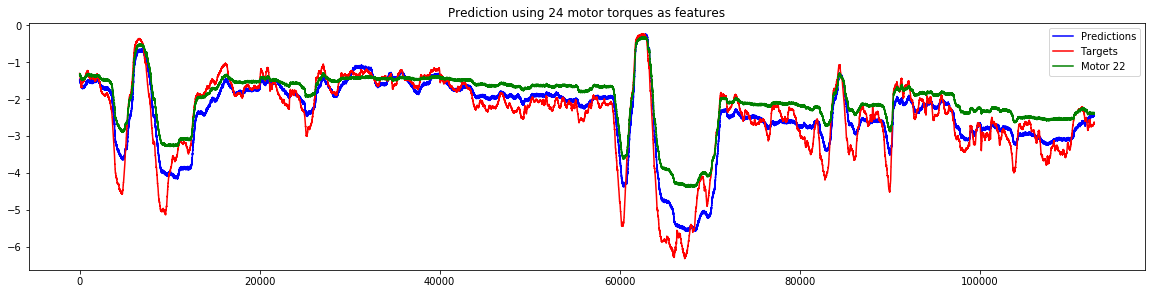

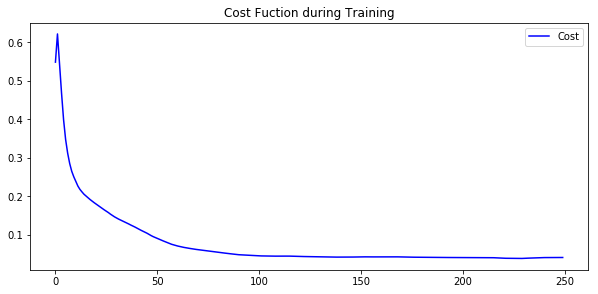

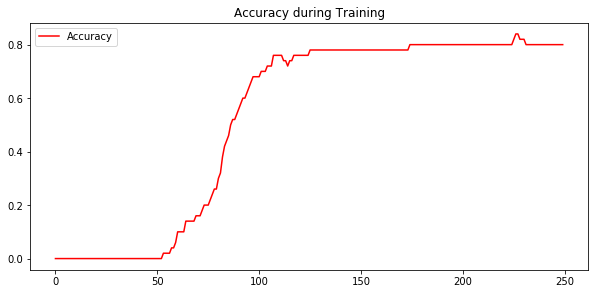

And now costs for iteration  7
[0.54869133, 0.62205809, 0.54429066, 0.46794778, 0.39867043, 0.34741485, 0.31188393, 0.28496113, 0.26488248, 0.25058663, 0.23834816, 0.22664943, 0.2179417, 0.21137351, 0.20526607, 0.20051396, 0.19600154, 0.19142082, 0.18725786, 0.18324845, 0.17945629, 0.17590818, 0.17186895, 0.16801406, 0.16442448, 0.16097343, 0.15741068, 0.15340115, 0.14989942, 0.14638956, 0.14330977, 0.14051814, 0.13802697, 0.1355928, 0.13293366, 0.13052613, 0.12780151, 0.12501547, 0.1226173, 0.11991476, 0.11700106, 0.11405063, 0.11143984, 0.10892826, 0.10657761, 0.10365125, 0.1005298, 0.097507708, 0.094853595, 0.092525631, 0.08998587, 0.087817326, 0.085716151, 0.083526582, 0.081382543, 0.079061203, 0.076984026, 0.075035699, 0.073474944, 0.072057806, 0.0704979, 0.069237225, 0.068132095, 0.066981882, 0.065980375, 0.064921677, 0.064196952, 0.063300997, 0.06247149, 0.061716586, 0.061052669, 0.060365912, 0.059713364, 0.059118208, 0.058396835, 0.057696495, 0.057032779, 0.056388006, 0.0556251

Epoch: 46, Cost: 0.07901670783758163, Accuracy: 0.019999999552965164
Epoch: 47, Cost: 0.07694679498672485, Accuracy: 0.019999999552965164
Epoch: 48, Cost: 0.07500022649765015, Accuracy: 0.019999999552965164
Epoch: 49, Cost: 0.07311735302209854, Accuracy: 0.05999999865889549
Epoch: 50, Cost: 0.0711778849363327, Accuracy: 0.05999999865889549
Epoch: 51, Cost: 0.06946948915719986, Accuracy: 0.05999999865889549
Epoch: 52, Cost: 0.06748703867197037, Accuracy: 0.11999999731779099
Epoch: 53, Cost: 0.06557495146989822, Accuracy: 0.14000000059604645
Epoch: 54, Cost: 0.06403997540473938, Accuracy: 0.14000000059604645
Epoch: 55, Cost: 0.06270866096019745, Accuracy: 0.14000000059604645
Epoch: 56, Cost: 0.06117480248212814, Accuracy: 0.14000000059604645
Epoch: 57, Cost: 0.05992867425084114, Accuracy: 0.14000000059604645
Epoch: 58, Cost: 0.05861378833651543, Accuracy: 0.1599999964237213
Epoch: 59, Cost: 0.05707310512661934, Accuracy: 0.23999999463558197
Epoch: 60, Cost: 0.055622730404138565, Accuracy

Epoch: 167, Cost: 0.031677089631557465, Accuracy: 0.8799999952316284
Epoch: 168, Cost: 0.031709086149930954, Accuracy: 0.8799999952316284
Epoch: 169, Cost: 0.031838271766901016, Accuracy: 0.8799999952316284
Epoch: 170, Cost: 0.03199546039104462, Accuracy: 0.8600000143051147
Epoch: 171, Cost: 0.032141126692295074, Accuracy: 0.8600000143051147
Epoch: 172, Cost: 0.03219112753868103, Accuracy: 0.8600000143051147
Epoch: 173, Cost: 0.032295361161231995, Accuracy: 0.8600000143051147
Epoch: 174, Cost: 0.0323372520506382, Accuracy: 0.8600000143051147
Epoch: 175, Cost: 0.03231463581323624, Accuracy: 0.8600000143051147
Epoch: 176, Cost: 0.0322473868727684, Accuracy: 0.8600000143051147
Epoch: 177, Cost: 0.03220140561461449, Accuracy: 0.8600000143051147
Epoch: 178, Cost: 0.03216056898236275, Accuracy: 0.8600000143051147
Epoch: 179, Cost: 0.03217751532793045, Accuracy: 0.8600000143051147
Epoch: 180, Cost: 0.03218049556016922, Accuracy: 0.8600000143051147
Epoch: 181, Cost: 0.032141976058483124, Accur

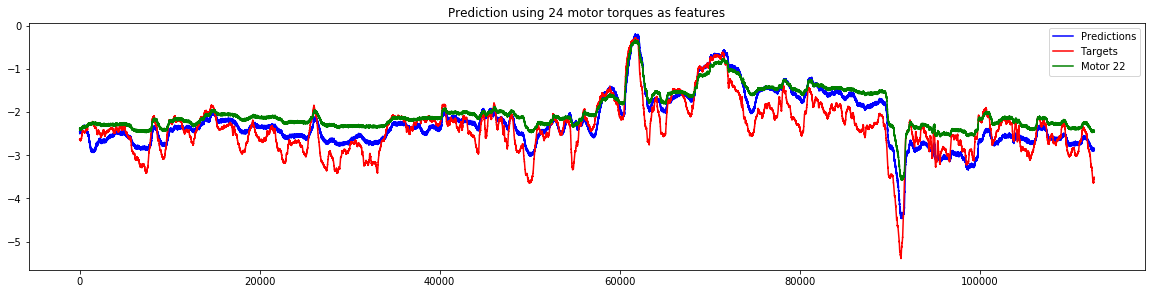

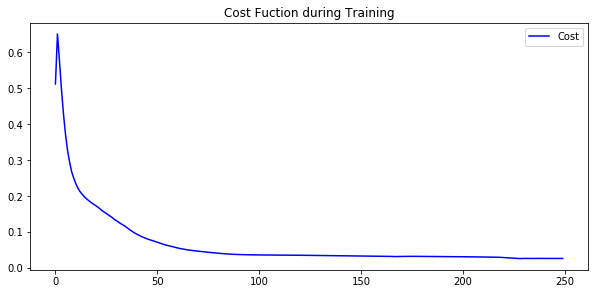

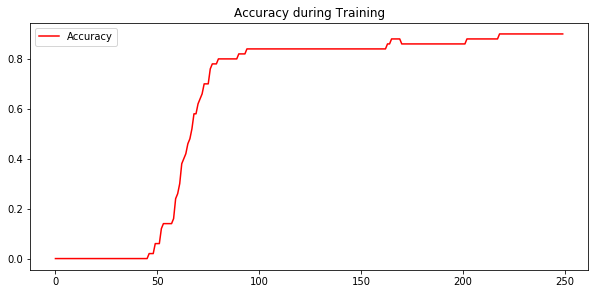

And now costs for iteration  8
[0.51142573, 0.65051568, 0.5743292, 0.49335319, 0.42437527, 0.368182, 0.32476071, 0.29281908, 0.26666361, 0.24948005, 0.23432042, 0.22243193, 0.21282066, 0.20564872, 0.19909558, 0.19358453, 0.18866718, 0.1840845, 0.18005304, 0.17609213, 0.17244269, 0.1683988, 0.16352524, 0.15886319, 0.15495302, 0.15125965, 0.14744945, 0.14367138, 0.1396115, 0.13486932, 0.13093735, 0.12722965, 0.12347208, 0.12012233, 0.11680601, 0.11250145, 0.10813669, 0.10414901, 0.10049023, 0.096919879, 0.093916014, 0.090779856, 0.087840617, 0.085503407, 0.083420724, 0.080925569, 0.079016708, 0.076946795, 0.075000226, 0.073117353, 0.071177885, 0.069469489, 0.067487039, 0.065574951, 0.064039975, 0.062708661, 0.061174802, 0.059928674, 0.058613788, 0.057073105, 0.05562273, 0.054180849, 0.053121638, 0.052112818, 0.051213607, 0.050225697, 0.049444064, 0.048663177, 0.048010059, 0.047344517, 0.046692133, 0.046073034, 0.045384273, 0.044695128, 0.044170793, 0.043702345, 0.043053675, 0.042519856, 

Epoch: 47, Cost: 0.7906126379966736, Accuracy: 0.0
Epoch: 48, Cost: 0.7879292368888855, Accuracy: 0.0
Epoch: 49, Cost: 0.7851712703704834, Accuracy: 0.0
Epoch: 50, Cost: 0.7819958329200745, Accuracy: 0.0
Epoch: 51, Cost: 0.7781124711036682, Accuracy: 0.0
Epoch: 52, Cost: 0.7740186452865601, Accuracy: 0.0
Epoch: 53, Cost: 0.7700492143630981, Accuracy: 0.0
Epoch: 54, Cost: 0.765837550163269, Accuracy: 0.0
Epoch: 55, Cost: 0.7620410323143005, Accuracy: 0.0
Epoch: 56, Cost: 0.7584294080734253, Accuracy: 0.0
Epoch: 57, Cost: 0.7545239925384521, Accuracy: 0.0
Epoch: 58, Cost: 0.7509714365005493, Accuracy: 0.0
Epoch: 59, Cost: 0.747535765171051, Accuracy: 0.0
Epoch: 60, Cost: 0.7441346645355225, Accuracy: 0.0
Epoch: 61, Cost: 0.7407997846603394, Accuracy: 0.0
Epoch: 62, Cost: 0.7371873259544373, Accuracy: 0.0
Epoch: 63, Cost: 0.7340419292449951, Accuracy: 0.0
Epoch: 64, Cost: 0.7307776808738708, Accuracy: 0.0
Epoch: 65, Cost: 0.7277414798736572, Accuracy: 0.0
Epoch: 66, Cost: 0.72504335641860

Epoch: 206, Cost: 0.5660400986671448, Accuracy: 0.0
Epoch: 207, Cost: 0.5660607814788818, Accuracy: 0.0
Epoch: 208, Cost: 0.5662059187889099, Accuracy: 0.0
Epoch: 209, Cost: 0.5663424134254456, Accuracy: 0.0
Epoch: 210, Cost: 0.566571056842804, Accuracy: 0.0
Epoch: 211, Cost: 0.5668323636054993, Accuracy: 0.0
Epoch: 212, Cost: 0.567171037197113, Accuracy: 0.0
Epoch: 213, Cost: 0.5674368143081665, Accuracy: 0.0
Epoch: 214, Cost: 0.5676792860031128, Accuracy: 0.0
Epoch: 215, Cost: 0.5681664347648621, Accuracy: 0.0
Epoch: 216, Cost: 0.5687780976295471, Accuracy: 0.0
Epoch: 217, Cost: 0.5694576501846313, Accuracy: 0.0
Epoch: 218, Cost: 0.5696189999580383, Accuracy: 0.0
Epoch: 219, Cost: 0.5692598223686218, Accuracy: 0.0
Epoch: 220, Cost: 0.568918764591217, Accuracy: 0.0
Epoch: 221, Cost: 0.5685603618621826, Accuracy: 0.0
Epoch: 222, Cost: 0.5682990550994873, Accuracy: 0.0
Epoch: 223, Cost: 0.5680276155471802, Accuracy: 0.0
Epoch: 224, Cost: 0.5677201151847839, Accuracy: 0.0
Epoch: 225, Cos

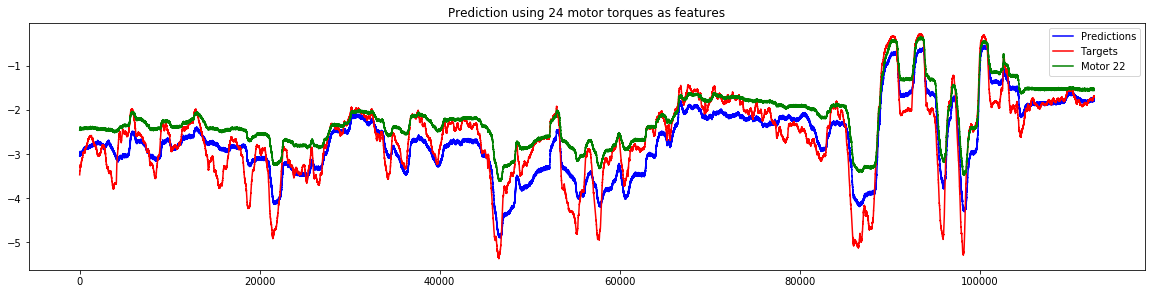

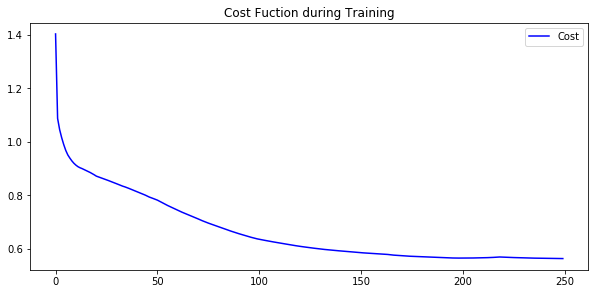

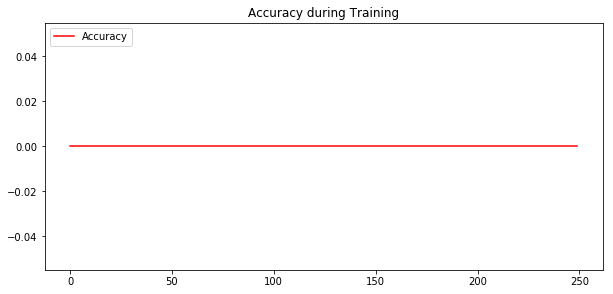

And now costs for iteration  9
[1.4029766, 1.0874716, 1.0454686, 1.0153605, 0.98980224, 0.96791953, 0.95113891, 0.93924403, 0.92862684, 0.91975886, 0.91272217, 0.907022, 0.90300632, 0.8999185, 0.89634073, 0.89236552, 0.88885224, 0.88527268, 0.88114327, 0.87662691, 0.87174284, 0.86903054, 0.8666684, 0.86398786, 0.86087358, 0.85804337, 0.8550669, 0.85190856, 0.84909791, 0.84626472, 0.84318757, 0.83999771, 0.83683777, 0.83406526, 0.83169699, 0.82888746, 0.82590234, 0.82280207, 0.82002866, 0.81702006, 0.81381273, 0.81027091, 0.8073867, 0.80434245, 0.80087906, 0.79705805, 0.79356313, 0.79061264, 0.78792924, 0.78517127, 0.78199583, 0.77811247, 0.77401865, 0.77004921, 0.76583755, 0.76204103, 0.75842941, 0.75452399, 0.75097144, 0.74753577, 0.74413466, 0.74079978, 0.73718733, 0.73404193, 0.73077768, 0.72774148, 0.72504336, 0.72177261, 0.71841657, 0.71502441, 0.71183431, 0.70839417, 0.70516211, 0.70206034, 0.69900203, 0.69618881, 0.69341451, 0.69088483, 0.68797541, 0.68531698, 0.68267715, 0.6800

In [9]:
init_op = tf.global_variables_initializer()
rmse=[]
rmse_motor=[]
for k in range(0,K):
    print("CROSS VALIDATION ITERATION",k)
    # Initializing session    
    sess = tf.Session()
    sess.run(init_op)

    #Define saver object to save NN
    locals()["saver_"+str(k)]=tf.train.Saver()
    train_features= effort[0:k*set_length,0:D]
    train_features=np.concatenate((train_features,effort[(k+1)*set_length:K*set_length,0:D]))
    
    test_features= effort[k*set_length:(k+1)*set_length,0:D]
    
    train_target= effort[0:k*set_length,D]
    train_target=np.concatenate((train_target,effort[(k+1)*set_length:K*set_length,D]))
    
    test_target=effort[k*set_length:(k+1)*set_length,D]
    
    #Reshaping data
    train_features=np.asarray(train_features)
    train_features=np.reshape(train_features,[len(train_features),D])
    test_features=np.asarray(test_features)
    test_features=np.reshape(test_features,[len(test_features),D])
    train_target=np.asarray(train_target)
    train_target=np.reshape(train_target,[len(train_target),1])
    test_target=np.asarray(test_target) 
    test_target=np.reshape(test_target,[len(test_target),1]) 

    costs = []
    accuracies=[]

    #setting up training
    for epoch in range(epochNumber):
        total_batch=int(len(train_features)/batch_size)
        for i in range(total_batch):   
            inp_data= train_features[i*batch_size:(i+1)*batch_size,:]
            out_data= train_target[i*batch_size:(i+1)*batch_size,:]
            _,acc,c = sess.run([optimizer,accuracy,cost],feed_dict={Xin: inp_data, Ytarget: out_data})
        print("Epoch: {}, Cost: {}, Accuracy: {}".format(epoch,c,acc))
        costs.append(c)
        accuracies.append(acc)

    #Save session after training
    saver_path=locals()["saver_"+str(k)].save(sess,'results/NN_tension_pred_saver',global_step=k)

    print ("\nTraining complete!")

    predicted=[]
    test_batch=int(len(test_features)/batch_size)

    #Test prediction with test dataset
    for j in range (test_batch):    
        inp_data = test_features[j*batch_size:(j+1)*batch_size,:]
        pred = sess.run(y_, feed_dict={Xin: inp_data})
        predicted=np.append(predicted,pred)

    #Plot prediction against real data from test dataset
    x=np.arange(0,len(test_target[0:(batch_size*test_batch)]))
    y_pred= predicted
    y_tar= test_target[0:(batch_size*test_batch)]
    #y3=-test_features[:,21]*0.0175/0.008
    y_motor=-test_features[0:(batch_size*test_batch),21]*0.0175/0.008

    fig= plt.figure(figsize=(20,10))
    ax1=plt.subplot(211)
    ax1.plot(x,y_pred,'b',label='Predictions')
    ax1.plot(x,y_tar,'r',label='Targets')
    ax1.plot(x,y_motor,'g',label='Motor 22')
    ax1.legend(loc="upper right")

    plt.title('Prediction using 24 motor torques as features')

    plt.show()
    
    # Plot cost function and accuracy
    x=np.arange(0,epochNumber)
    y= costs

    fig= plt.figure(figsize=(10,10))
    ax1=plt.subplot(211)
    ax1.plot(x,y,'b',label='Cost')
    ax1.legend(loc="upper right")

    plt.title('Cost Fuction during Training')

    plt.show()

    # Plot cost function and accuracy
    x=np.arange(0,epochNumber)
    y= accuracies

    fig= plt.figure(figsize=(10,10))
    ax1=plt.subplot(211)
    ax1.plot(x,y,'r',label='Accuracy')
    ax1.legend(loc="upper left")

    plt.title('Accuracy during Training')

    plt.show()
    
    rmse=np.append(rmse,sqrt(mean_squared_error(y_pred,y_tar)))
    rmse_motor=np.append(rmse_motor,sqrt(mean_squared_error(y_motor,y_tar)))
    print("And now costs for iteration ", k)
    print(costs)
    print("And now accuracies for iteration ", k)
    print(accuracies)
    print("Root mean squared error of prediction",rmse[k])
    print("Root mean squared error of motor",rmse_motor[k])

    sess.close()
print(rmse)
print(rmse_motor)

In [ ]:
# ADAM
#batch_size=800, lr=0.0001, K=10, H=4*D, epoch_number=100 
#[ 0.50253549  0.43781634  0.32040607  0.32329862  0.36412889  0.35812448
#  0.27207648  0.43003502  0.32162693  0.40849026]
#[ 0.70579643  0.64966416  0.50766536  0.50934368  0.59895063  0.61945065
#  0.48574498  0.67014488  0.48967202  0.61927773]
#
#batch_size=100, lr=0.0003, K=10, H=5*D, epoch_number=100
#[ 0.46218572  0.44220819  0.39805842  0.41903569  0.3219875   0.3759407
#  0.35630052  0.46268236  0.37257996  0.54600813]
#[ 0.70500703  0.64769705  0.50612557  0.50971187  0.59769723  0.61814086
#  0.48427049  0.66855334  0.4923125   0.61763899]


#batch_size=500, lr=0.0003, K=10, H=5*D, epoch_number=100
#[ 0.45112949  0.41166623  0.3488705   0.33144462  0.30662881  0.37951444
#  0.26394875  0.4951899   0.29257544  0.48440297]
#[ 0.70496692  0.64826301  0.50657057  0.50966813  0.59798115  0.61856779
#  0.48468212  0.66901232  0.49050164  0.61812131]

#batch_size=500, lr=0.0003, K=10, H=5*D, epoch_number=300
#[ 0.46730755  0.39162348  0.33621428  0.35487699  0.33413626  0.4338099
#  0.338667    0.46846256  0.3382114   0.55634947]
#[ 0.70496692  0.64826301  0.50657057  0.50966813  0.59798115  0.61856779
#  0.48468212  0.66901232  0.49050164  0.61812131]

##batch_size=200, lr=0.00005, K=10, H=15*D, epoch_number=100
#[ 0.43956565  0.39496273  0.30556959  0.32533406  0.33855176  0.37363014
#  0.28639368  0.46719669  0.31364863  0.42626489]
#[ 0.70492231  0.64797778  0.50634846  0.50969095  0.59783157  0.61834494
#  0.48447538  0.66878822  0.49126617  0.6178877 ]

#batch_size=200, lr=0.00005, K=10, H=20*D, epoch_number=100
#[ 0.45373054  0.39110336  0.32326501  0.33262925  0.35039483  0.40166448
#  0.25592091  0.4547832   0.30091716  0.44751162]
#[ 0.70492231  0.64797778  0.50634846  0.50969095  0.59783157  0.61834494
#  0.48447538  0.66878822  0.49126617  0.6178877 ]


#MINI BATCH GD
#batch_size=100, lr=0.00001, K=10, H=15*D, epoch_number=200
#[ 0.48721713,  0.43863498,  0.33641318,  0.33274214,  0.36547824,  0.35071493,
#  0.27092393,  0.42188746,  0.33233472,  0.42640026]
#[ 0.70500703  0.64769705  0.50612557  0.50971187  0.59769723  0.61814086
#  0.48427049  0.66855334  0.4923125   0.61763899]

#batch_size=50, lr=0.00001, K=10, H=15*D, epoch_number=100
#[ 0.48799102  0.45342051  0.33284949  0.32443756  0.35144045  0.34472716
#  0.28091073  0.42006393  0.33825867  0.42149133]
#[ 0.70509088  0.64755575  0.50601392  0.50971825  0.59763682  0.61804062
#  0.48416542  0.66842852  0.49275822  0.61751091]


#batch_size=50, lr=0.00001, K=10, H=18*D, epoch_number=100
#[ 0.49460297  0.45634525  0.32905642  0.32753956  0.35563032  0.35412292
#  0.27835449  0.42779808  0.33047787  0.41999861]
#[ 0.70509088  0.64755575  0.50601392  0.50971825  0.59763682  0.61804062
#  0.48416542  0.66842852  0.49275822  0.61751091]

#batch_size=50, lr=0.00001, K=10, H=10*D, epoch_number=100
#[ 0.48540827  0.44815957  0.33539943  0.33215633  0.37294727  0.34524683
#  0.26910294  0.42505782  0.34029048  0.42350589]
#[ 0.70509088  0.64755575  0.50601392  0.50971825  0.59763682  0.61804062
#  0.48416542  0.66842852  0.49275822  0.61751091]


#batch_size=50, lr=0.00001, K=7, H=15*D, epoch_number=100
[ 0.49522226  0.3746474   0.35643217  0.33235772  0.33975522  0.34873753
  0.41965114]
[ 0.69181523  0.56609945  0.54216891  0.58965845  0.54702666  0.5808668
  0.59657655]

#batch_size=50, lr=0.000005, K=10, H=15*D, epoch_number=200
[ 0.48740707  0.46531014  0.33256863  0.33262834  0.35801402  0.34543959
  0.28328477  0.41193634  0.33103235  0.42206953]
[ 0.70509088  0.64755575  0.50601392  0.50971825  0.59763682  0.61804062
  0.48416542  0.66842852  0.49275822  0.61751091]


GOOD ONE
#batch_size=50, lr=0.000005, K=10, H=15*D, epoch_number=300
# [0.47976632  0.45696714  0.33366897  0.3296227   0.35630887  0.33606939
#  0.28331008  0.41057156  0.32990863  0.42158835]
#[ 0.70509088  0.64755575  0.50601392  0.50971825  0.59763682  0.61804062
#  0.48416542  0.66842852  0.49275822  0.61751091]

In [12]:
ciao=[ 0.70509088,  0.64755575 , 0.50601392 , 0.50971825 , 0.59763682,  0.61804062,
  0.48416542 , 0.66842852 , 0.49275822 , 0.61751091]

In [13]:
print(np.mean(ciao))

0.584691931


In [ ]:
NEXT: do same but more epochs